# Lab 14 - Normal Distribution and Variance of Sample Means

Welcome to Lab 14 !

In today's lab, we will learn about [the variance of sample means](https://www.inferentialthinking.com/chapters/14/5/variability-of-the-sample-mean.html) as well as [the normal distribution](https://www.inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html).

In [76]:
from datascience import *
import pandas as pd
import numpy as np 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 1. Normal Distributions

When we visualize the distribution of a sample, we are often interested in the mean and the standard deviation of the sample (for the rest of this lab, we will abbreviate “standard deviation” as “SD”). These two summary statistics can give us a bird’s eye view of the distribution - by letting us know where the distribution sits on the number line and how spread out it is, respectively. 

We want to check if the data is linearly related, so we should look at the data.

**Question 1:** The next cell loads the table `births` which is a large random sample of US births and includes information about mother-child pairs. 

Create a histogram plot of the distribution of mother’s ages from the table. Where does the mean fall on the plot you created ? Plot the mean using a scatter plot.

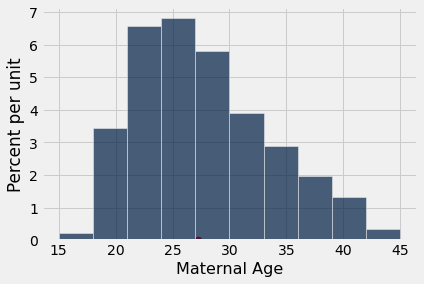

In [77]:
births = Table.read_table('baby.csv')
births.hist("Maternal Age")
plt.scatter(np.mean(births.column("Maternal Age")), 0, color='red', s=50);

From the plot above, we can see that the mean is the center of gravity or balance point of the distribution. If you cut the distribution out of cardboard, and then placed your finger at the mean, the distribution would perfectly balance on your finger. Since the distribution above is right skewed (which means it has a long right tail), we know that the mean of the distribution is larger than the median, which is the “halfway” point of the data. Conversely, if the distribution had been left skewed, we know the mean would be smaller than the median.

**Question 2:** Plot the median of the mother's ages on your histogram plot as well. Your final plot should display the histogram, the mean, and the median.

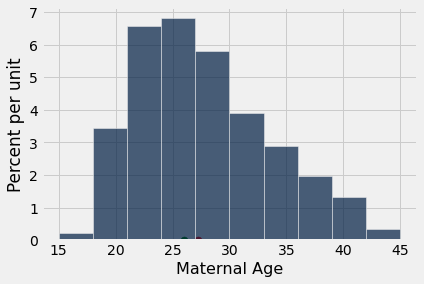

In [78]:
births.hist("Maternal Age")
plt.scatter(np.mean(births.column("Maternal Age")), 0, color='red', s=50);
plt.scatter(np.median(births.column("Maternal Age")), 0, color='green', s=50);

We are also interested in the standard deviation of mother’s ages. The SD gives us a sense of how variable mothers' ages are around the average mothers' age. If the SD is large, then the mothers' heights should spread over a large range from the mean. If the SD is small, then the mothers' heights should be tightly clustered around the average mother height. 

**The SD of an array is defined as the root mean square of deviations (differences) from average**.

Fun fact! σ (Greek letter sigma) is used to represent the SD and  μ (Greek letter mu) is used for the mean.

**Question 3:** Calculate the mean and standard deviations, and then scatter the deviations of the mean on your histogram. Run the cell below to see the width of one SD (blue) from the sample mean (red) plotted on the histogram of maternal ages.

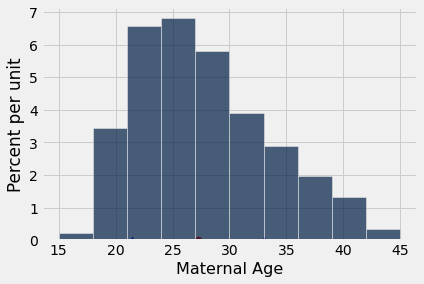

In [79]:
age_mean = np.mean(births.column("Maternal Age"))
age_sd = np.std(births.column("Maternal Age"))
births.hist("Maternal Age")

plt.scatter(age_mean, 0, color='red', s=50);
plt.scatter(age_mean+age_sd, 0, marker='^', color='blue', s=50);
plt.scatter(age_mean-age_sd, 0, marker='^', color='blue', s=50);

In this histogram, the standard deviation is not easy to identify just by looking at the graph.

However, the distributions of some variables allow us to easily spot the standard deviation on the plot. For example, if a sample follows a *normal distribution*, the standard deviation is easily spotted at the point of inflection (the point where the curve begins to change the direction of its curvature) of the distribution. 

**Question 4:** Fill in the following code to examine the distribution of maternal heights, which is roughly normally distributed. We’ll plot the standard deviation on the histogram, as before - notice where one standard deviation (blue) away from the mean (red) falls on the plot.


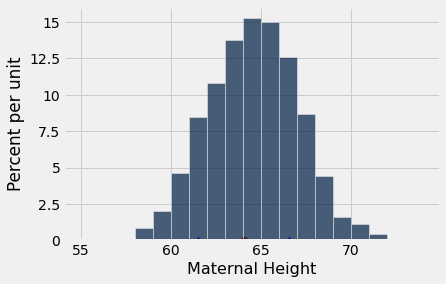

In [80]:
height_mean = np.mean(births.column("Maternal Height"))
height_sd = np.std(births.column("Maternal Height"))
births.hist("Maternal Height", bins=np.arange(55,75,1))

plt.scatter((height_mean), 0, color='red', s=50);
plt.scatter(height_mean+height_sd, 0, marker='^', color='blue', s=50);
plt.scatter(height_mean-height_sd, 0, marker='^', color='blue', s=50);

We don’t always know how a variable will be distributed, and making assumptions about whether or not a variable will follow a normal distribution is dangerous. However, the Central Limit Theorem defines one distribution that always follows a normal distribution. The distribution of the *sums* and *means* of many large random samples drawn with replacement from a single distribution (regardless of the distribution’s original shape) will be normally distributed. Remember that the Central Limit Theorem refers to the distribution of a *statistic* calculated from a distribution, not the distribution of the original sample or population. If this is confusing, ask a TA!

The next section will explore distributions of sample means, and you will see how the standard deviation of these distributions depends on sample sizes.

# 2. Variability of the Sample Mean

By the [Central Limit Theorem](https://www.inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html), the probability distribution of the mean of a large random sample is roughly normal. The bell curve is centered at the population mean. Some of the sample means are higher and some are lower, but the deviations from the population mean are roughly symmetric on either side, as we have seen repeatedly. Formally, probability theory shows that the sample mean is an **unbiased estimate** of the population mean.

In our simulations, we also noticed that the means of larger samples tend to be more tightly clustered around the population mean than means of smaller samples. In this section, we will quantify the [variability of the sample mean](https://www.inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) and develop a relation between the variability and the sample size.

Let's take a look at the salaries of employees of the City of San Francisco in 2014. The mean salary reported by the city government was about $75,463.92.

*Note: If you get stuck on any part of this lab, please refer to [chapter 14 of the textbook](https://www.inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html).*

In [81]:
salaries = Table.read_table('sf_salaries_2014.csv').select("salary")
salaries

salary
471953
390112
339654
326717
326233
344187
311299
310161
335485
329391


In [82]:
salary_mean = np.mean(salaries.column('salary'))
print('Mean salary of San Francisco city employees in 2014: ', salary_mean)

Mean salary of San Francisco city employees in 2014:  75463.91814023031


/opt/conda/lib/python3.8/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


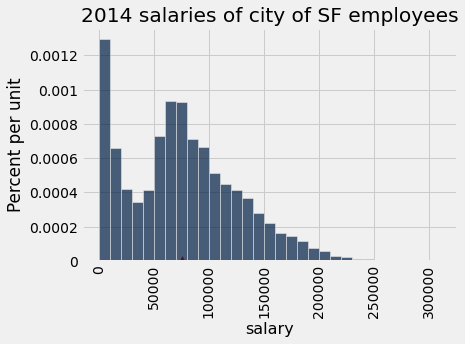

In [83]:
salaries.hist('salary', bins=np.arange(0, 300000+10000*2, 10000))
plt.scatter(salary_mean, 0, marker='^', color='red', s=100);
plt.title('2014 salaries of city of SF employees');

Clearly, the population does not follow a normal distribution. Keep that in mind as we progress through these exercises.

Let's take random samples *with replacement* and look at the probability distribution of the sample mean. As usual, we will use simulation to get an empirical approximation to this distribution.

**Question 1.** The cell below defines a function called `one_sample_mean`. Its arguments are `table` (the name of a table), `label` (the label of the column containing the variable), and `sample size`(the number of employees in the sample). It samples with replacement from the table and
returns the mean of the `label` column of the sample.

##### Rewrite the function using **pandas** library.

Note: You will have to save the original csv in a diffferent variable name than 'salaries'.

In [84]:
other_salaries = pd.read_csv("sf_salaries_2014.csv")
other_salaries = other_salaries.drop('Unnamed: 0', axis=1)
other_salaries

,salary
0,471952.64
1,390111.98
2,339653.70
3,326716.76
4,326233.44
...,...
38118,0.00
38119,0.00
38120,0.00
38121,0.00


In [85]:
def one_sample_mean(table, label, sample_size):
    new_sample = table.sample(sample_size)
    new_sample_mean = np.mean(new_sample.column(label))
    return new_sample_mean
one_sample_mean(salaries,'salary',500)

76859.22922

In [86]:
# Your Code
def one_sample_mean_pd(table, label, sample_size):
    new_sample = table.sample(sample_size)
    new_sample_mean = np.mean(new_sample[label])
    return new_sample_mean
one_sample_mean_pd(other_salaries,'salary',500)

79084.55732

**Question 2:** The cell below uses the `one_sample_mean` function to define a function called `simulate_sample_mean`. The arguments are the name of the table, the label of the column containing the variable, the sample size, and the number of simulations.

The function samples with replacement from the table and calculate the mean of each sample. It saves the sample means in an array called means. The remaining code in the function displays an empirical histogram of the sample means.

##### Rewrite the function using **pandas** library.

Note: You will have to save the original csv in a diffferent variable name than 'salaries'.

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75482.59177975002
Population SD: 51697.0349864653
SD of sample means: 5181.622900175493


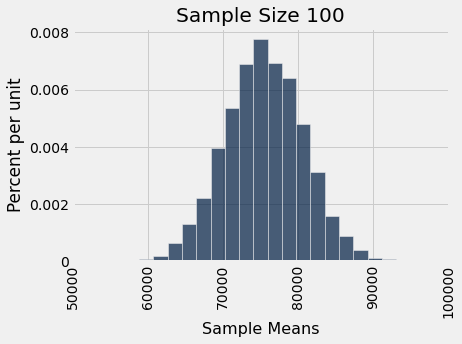

In [87]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = list()

    for i in np.arange(repetitions):
        new_sample_mean = one_sample_mean(table,label,sample_size)
        means.append(new_sample_mean)
        
        

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities – don't change this!
    sample_means.hist(bins=20)
    plt.xlabel('Sample Means')
    plt.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))
    return np.std(means)

simulate_sample_mean(salaries, 'salary', 100, 10000) 
plt.xlim(50000, 100000);

Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75482.50589510999
Population SD: 51697.0349864653
SD of sample means: 5177.236642170688


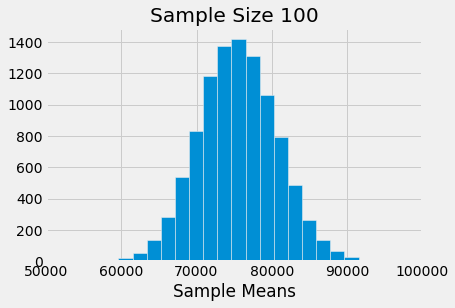

In [88]:
#Your code 
def simulate_sample_mean_np(table, label, sample_size, repetitions):
    
    means = list()

    for i in np.arange(repetitions):
        new_sample_mean = one_sample_mean_pd(table,label,sample_size)
        means.append(new_sample_mean)

    sample_means = means
    
    # Display empirical histogram and print all relevant quantities – don't change this!
    plt.hist(sample_means, bins=20)
    plt.xlabel('Sample Means')
    plt.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table[label]))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table[label]))
    print("SD of sample means:", np.std(means))
    return np.std(means)

simulate_sample_mean_np(other_salaries, 'salary', 100, 10000) 
plt.xlim(50000, 100000);

**Question 3:** Simulate two sample means, one for a sample of 400 salaries and one for a sample of 625 salaries. In each case, perform 10,000 repetitions. Don't worry about the `plots.xlim` line – it just makes sure that all of the plots have the same x-axis. 

Sample size:  400
Population mean: 75463.91814023031
Average of sample means:  75448.5578035625
Population SD: 51697.0349864653
SD of sample means: 2594.7617531475503


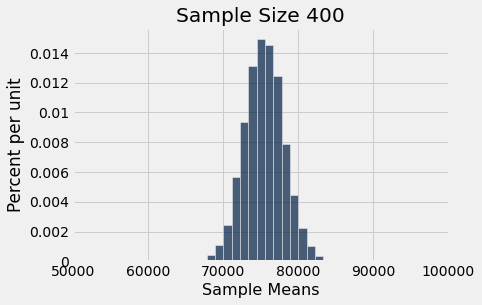



Sample size:  625
Population mean: 75463.91814023031
Average of sample means:  75468.524785592
Population SD: 51697.0349864653
SD of sample means: 2064.980946492085


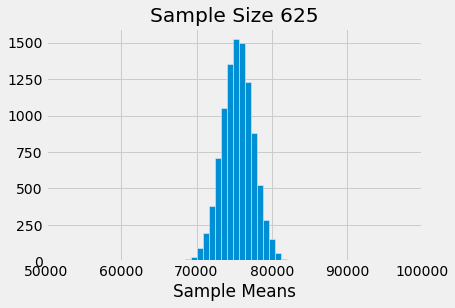

In [89]:
simulate_sample_mean(salaries, 'salary', 400, 10000)
plt.xlim(50000, 100000);
plt.show();
print('\n')
simulate_sample_mean_np(other_salaries, 'salary', 625, 10000)
plt.xlim(50000, 100000);
plt.show();

**Question 4:** Assign `q_4` to an array of numbers corresponding to true statement(s) about the plots from question 3.

1. We see the Central Limit Theorem (CLT) in action because the distributions of the sample means are bell-shaped.
2. We see the Law of Averages in action because the distributions of the sample means look like the distribution of the population.
3. One of the conditions for CLT is that we have to draw a small random sample with replacement from the population.
4. One of the conditions for CLT is that we have to draw a large random sample with replacement from the population.
5. One of the conditions for CLT is that the population must be normally distributed.
6. Both plots in 2.3 are roughly centered around the population mean.
7. Both plots in 2.3 are roughly centered around the mean of a particular sample.
8. The distribution of sample means for sample size 625 has less variability than the distribution of sample means for sample size 400.
9. The distribution of sample means for sample size 625 has more variability than the distribution of sample means for sample size 400.


In [90]:
q_4 = make_array(1,8,4,6)
q_4

array([1, 8, 4, 6])

Below, we'll look at what happens when we take an increasing number of resamples of a fixed sample size. Notice what number in the code changes, and what stays the same. How does the distribution of the resampled means change?

Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75593.5566216
Population SD: 51697.0349864653
SD of sample means: 5216.387139983686


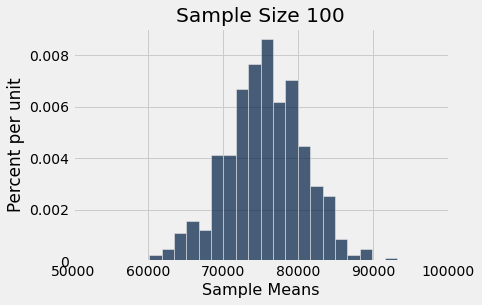

In [91]:
simulate_sample_mean(salaries, 'salary', 100, 500)
plt.xlim(50000, 100000);

Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75573.90402629999
Population SD: 51697.0349864653
SD of sample means: 5269.62008693806


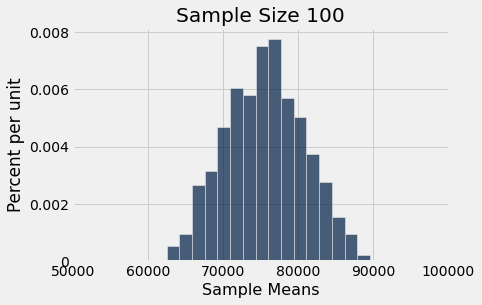

In [92]:
simulate_sample_mean(salaries, 'salary', 100, 1000)
plt.xlim(50000, 100000);

Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75448.25244136
Population SD: 51697.0349864653
SD of sample means: 5148.505969906504


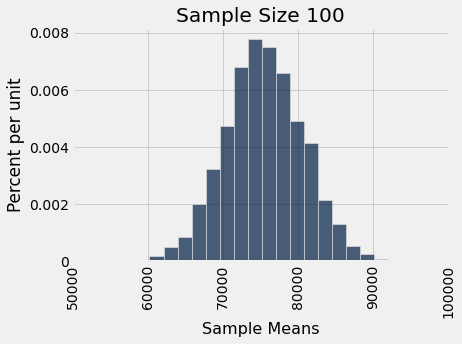

In [93]:
simulate_sample_mean(salaries, 'salary', 100, 5000)
plt.xlim(50000, 100000);

Sample size:  100
Population mean: 75463.91814023031
Average of sample means:  75458.88285409998
Population SD: 51697.0349864653
SD of sample means: 5249.255732850442


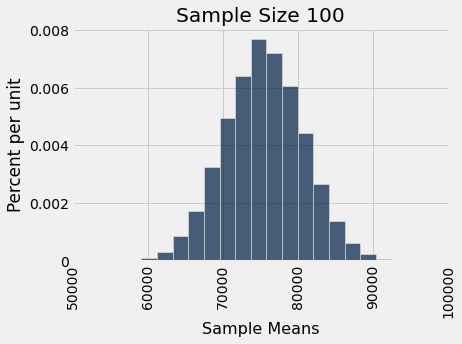

In [94]:
simulate_sample_mean(salaries, 'salary', 100, 10000)
plt.xlim(50000, 100000);

**Question 5:** Assign the variable `SD_of_sample_means` to the integer corresponding to your answer to the following question:

When I increase the number of resamples that I take, for a fixed sample size, the SD of my sample means will...

1. Increase
2. Decrease
3. Stay about the same
4. Vary widly


In [95]:
SD_of_sample_means = 3
SD_of_sample_means

3

**Question 6:** Let's think about how the relationships between population SD, sample SD, and SD of sample means change with varying sample size. Which of the following is true? Assign the variable `pop_vs_sample` to an array of integer(s) that correspond to true statement(s).

1. Sample SD gets smaller with increasing sample size.
2. Sample SD gets larger with increasing sample size.
3. Sample SD becomes more consistent with population SD with increasing sample size.
4. SD of sample means gets smaller with increasing sample size.
5. SD of sample means gets larger with increasing sample size.
6. SD of sample means stays the same with increasing sample size.


In [96]:
pop_vs_sample = make_array(3,4)
pop_vs_sample

array([3, 4])

Run the following three cells multiple times and examine how the sample SD and the SD of sample means change with sample size.

The first histogram is of the sample; the second histogram is the distribution of sample means with that particular sample size. Adjust the bins as necessary.

Sample SD:  47964.28297540302
Sample size:  10
Population mean: 75463.91814023031
Average of sample means:  75115.21228800001
Population SD: 51697.0349864653
SD of sample means: 16537.80655116689


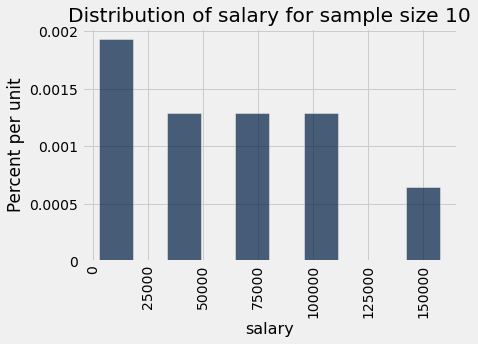

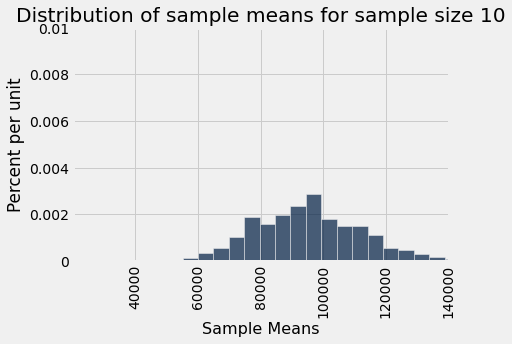

In [97]:
sample_10 = salaries.sample(10)
sample_10.hist("salary")
plt.title('Distribution of salary for sample size 10')
print("Sample SD: ", np.std(sample_10.column("salary")))
simulate_sample_mean(salaries, 'salary', 10, 1000)
plt.xlim(5,120000);
plt.ylim(0, .0001);
plt.title('Distribution of sample means for sample size 10');

Sample SD:  53167.591292316785
Sample size:  200
Population mean: 75463.91814023031
Average of sample means:  75745.50748469999
Population SD: 51697.0349864653
SD of sample means: 3658.3277568338704


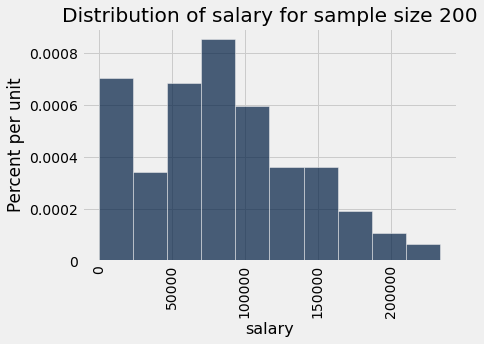

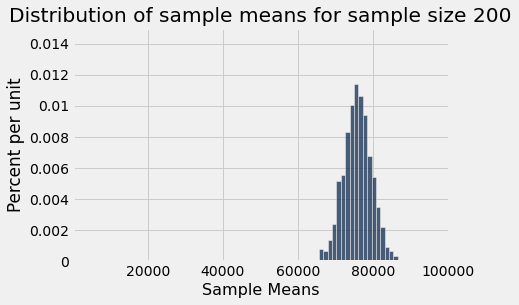

In [98]:
sample_200 = salaries.sample(200)
sample_200.hist("salary")
plt.title('Distribution of salary for sample size 200')
print("Sample SD: ", np.std(sample_200.column("salary")))
simulate_sample_mean(salaries, 'salary', 200, 1000)
plt.xlim(5,100000)
plt.ylim(0, .00015);
plt.title('Distribution of sample means for sample size 200');

Sample SD:  51458.68491433958
Sample size:  1000
Population mean: 75463.91814023031
Average of sample means:  75523.36137175
Population SD: 51697.0349864653
SD of sample means: 1605.175661556287


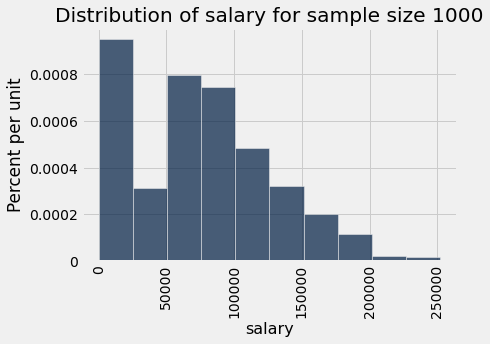

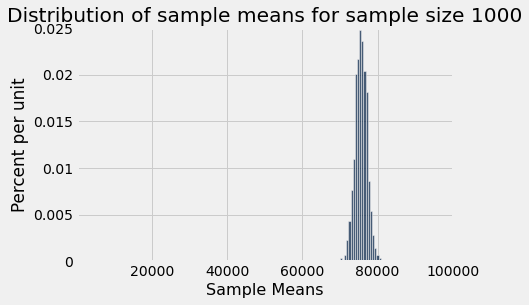

In [99]:
sample_1000 = salaries.sample(1000)
sample_1000.hist("salary")
plt.title('Distribution of salary for sample size 1000')
print("Sample SD: ", np.std(sample_1000.column("salary")))
simulate_sample_mean(salaries, 'salary', 1000, 1000)
plt.xlim(5,100000)
plt.ylim(0, .00025);
plt.title('Distribution of sample means for sample size 1000');

You should notice that the distribution of means gets narrower and spikier, and that the distribution of the sample increasingly looks like the distribution of the population as we get to larger sample sizes.

Let's illustrate these trends. Below, you will see how the sample SD changes with respect to sample size (N). The blue line is the population SD.

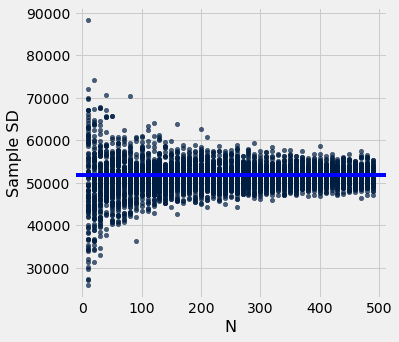

In [100]:
# Don't change this cell, just run it!
pop_sd = np.std(salaries.column('salary'))
sample_sds = make_array()
sample_sizes = make_array()
for i in np.arange(10, 500, 10):
    sample_sds = np.append(sample_sds, [np.std(salaries.sample(i).column("salary")) for d in np.arange(100)])
    sample_sizes = np.append(sample_sizes, np.ones(100) * i)
Table().with_columns("Sample SD", sample_sds, "N", sample_sizes).scatter("N", "Sample SD")
matplotlib.pyplot.axhline(y=pop_sd, color='blue', linestyle='-');

The next cell shows how the SD of the sample means changes relative to the sample size (N).

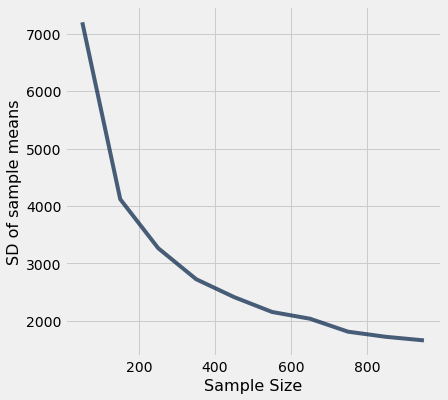

In [101]:
# Don't change this cell, just run it!
def sample_means(sample_size):
    means = make_array()
    for i in np.arange(1000):
        sample = salaries.sample(sample_size).column('salary')
        means = np.append(means, np.mean(sample))
    return np.std(means)

sample_mean_SDs = make_array()
for i in np.arange(50, 1000, 100):
    sample_mean_SDs = np.append(sample_mean_SDs, sample_means(i))
Table().with_columns("SD of sample means", sample_mean_SDs, "Sample Size", np.arange(50, 1000, 100))\
.plot("Sample Size", "SD of sample means")

From these two plots, we can see that the SD of our sample approaches the SD of our population as our sample size increases, but the SD of our sample means (in other words, the variability of the sample mean) decreases as our sample size increases.

**Question 7:** Is there a relationship between the sample size and the standard deviation of the sample mean? Assign `q_7` to the number corresponding to the statement that answers this question.

1. The SD of the sample means is inversely proportional to the square root of sample size.
2. The SD of the sample means is directly proportional to the square root of sample size.


In [102]:
q_7 = 1
q_7 

1

Throughout this lab, we have been taking many random samples from a population. However, all of these principles hold for bootstrapped resamples from a single sample. If your original sample is relatively large, all of your re-samples will also be relatively large, and so the SD of resampled means will be relatively small.

In order to change the variability of your sample mean, you’d have to change the size of the original sample from which you are taking bootstrapped resamples.